## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
import category_encoders as ce #Encoding
from yellowbrick.cluster import KElbowVisualizer

In [2]:
collegeDF= pd.read_csv("College.csv")

In [3]:
collegeDF.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#collegeDF.describe()

## Here we use .info to get the information on dataypes in the dataframe. 

#### Unamed vector and private vector to be dropped. We will not do one hot encoding + kmeans due to the fact that we will lose interpritability. 

In [5]:
collegeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


## Verification of No NULL 

In [6]:
collegeDF.isnull().sum()


Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [7]:
collegeDF2 = collegeDF.drop(['Unnamed: 0', 'Private'], axis=1)

In [8]:
collegeDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


### all feature vectors are now numeric and ready for standardization. 

In [9]:
collegeDF2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
scaler = preprocessing.StandardScaler().fit(collegeDF2)

In [11]:
scaler.mean_

array([ 3001.63835264,  2018.8043758 ,   779.97297297,    27.55855856,
          55.7966538 ,  3699.90733591,   855.2985843 , 10440.66924067,
        4357.52638353,   549.38095238,  1340.64221364,    72.66023166,
          79.7027027 ,    14.08970399,    22.74388674,  9660.17117117,
          65.46332046])

In [12]:
scaler.scale_

array([3.86771021e+03, 2.44953617e+03, 9.28578072e+02, 1.76290091e+01,
       1.97920291e+01, 4.84729828e+03, 1.52145189e+03, 4.02042684e+03,
       1.09599046e+03, 1.64999081e+02, 6.76635617e+02, 1.63176441e+01,
       1.47128816e+01, 3.95580111e+00, 1.23838248e+01, 5.21840715e+03,
       1.71666525e+01])

In [13]:
features = scaler.transform(collegeDF2)

In [14]:
print(features)

[[-3.46881819e-01 -3.21205453e-01 -6.35089011e-02 ... -8.67574189e-01
  -5.01910084e-01 -3.18251941e-01]
 [-2.10884040e-01 -3.87029908e-02 -2.88584214e-01 ... -5.44572203e-01
   1.66109850e-01 -5.51261842e-01]
 [-4.06865631e-01 -3.76317928e-01 -4.78121319e-01 ...  5.85934748e-01
  -1.77289956e-01 -6.67766793e-01]
 ...
 [-2.33895071e-01 -4.23771558e-02 -9.15087008e-02 ... -2.21570217e-01
  -2.56241250e-01 -9.59029170e-01]
 [ 1.99171118e+00  1.77256262e-01  5.78332661e-01 ...  2.12019418e+00
   5.88797079e+00  1.95359460e+00]
 [-3.26765760e-03 -6.68715889e-02 -9.58163623e-02 ...  4.24433755e-01
  -9.87115613e-01  1.95359460e+00]]


### Finding optimal k using elbow method 

In [15]:
np.random.seed=(5)

#### Elbow found at k=3

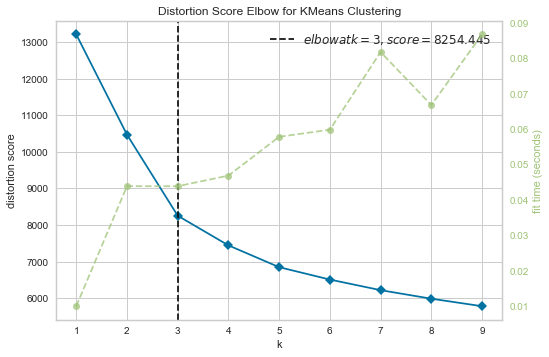

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()

## Some visualization graduation rate by room/board on private feature

In [9]:
#sns.set_style('whitegrid')
#sns.lmplot('Room.Board','Grad.Rate',data=collegeDF, hue='Private',
          # palette='coolwarm',size=6,aspect=1,fit_reg=False)

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

#collegeDF['Grad.Rate']['Cazenovia College'] = 100

#collegeDF[collegeDF['Grad.Rate'] > 100]

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)